In [21]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import openpyxl

In [22]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.amazon.in/MI-Precision-Trimming-Charging-Settings/dp/B0BZZ263YF/ref=sr_1_7',headers = headers).text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- s
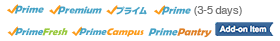
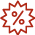

In [23]:
webpage

In [24]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="preconnect"
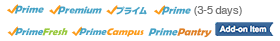
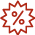

In [25]:
print(soup.prettify())

In [26]:
desc = soup.find_all('div', class_='a-section a-spacing-medium a-spacing-top-small')[0].text.strip()
desc

"About this item    Perfect Trim Every time - Trim with confidence! Our trimmer's 0.5mm precision ensures a flawless grooming every time.    Goodbye to Frequent Charging! - Effortlessly maintain your grooming routine with our Xiaomi Trimmer 2C, boasting a 90-minutes of grooming and a quick 2-hour charging time.    40 lengths Precise Grooming - With 40 length settings to choose from, Xiaomi Beard trimmer makes it easy to achieve your desired style with precision and ease.    Quick and Versatile Charging - Experience a convenience and speed of Type-C charging, allowing for faster charging and easy compatibility with multiple devices.    No More Guessing Games - Get a precise trimming experience with our LED indicator, making it easier to track battery life.    No Cords, No Limits! - Unleash your grooming potential with our cordless beard trimmer    Travel & Kid Friendly - Xiaomi Trimmer 2C is designed with convenience and safety in mind, featuring safety lock and pouch, washable attachme

In [27]:
noOfReviews = soup.find_all('span', id="acrCustomerReviewText")[0].text.strip()
noOfReviews

'5,786 ratings'

In [28]:
best_seller_class = soup.find(class_='a-icon a-icon-addon p13n-best-seller-badge')

if best_seller_class:
    bestSeller='YES'
    print("YES")
else:
    bestSeller='NO'
    print("NO")

YES


In [29]:
ul_element = soup.find('ul', class_='a-unordered-list a-nostyle a-button-list a-vertical a-spacing-top-micro regularAltImageViewLayout')  # Replace 'your-ul-class' with the actual class of the ul element

if ul_element:
    # Find all li tags within the ul element
    li_tags = ul_element.find_all('li')

    # Count the number of li tags
    num_li_tags = len(li_tags)

    print(num_li_tags)
else:
    print("0")

10


In [30]:
title = soup.find_all('span', id="productTitle")[0].text.strip()
title

'MI Xiaomi Beard Trimmer for Men 2C With High Precision Trimming | 2 Beard Comb | USB Type-C | Fast Charging | 0.5mm Precision | 40 Length Settings | 90 Min Run Time, Black'

In [31]:
price = soup.find_all('span', class_='a-price-whole')[0].text.strip()
price

'1,099.'

In [32]:
rating = soup.find_all('span', class_='a-size-medium a-color-base')[0].text.strip()
rating

'4.2 out of 5'

In [33]:
bankOffers = soup.find_all('span', class_="sopp-offer-title")[0].text.strip()
number_of_offers = int(''.join(filter(str.isdigit, bankOffers)))
number_of_offers

19

In [34]:
workbook = openpyxl.Workbook()
worksheet = workbook.active

In [35]:
workbook = openpyxl.Workbook()
worksheet = workbook.active

In [36]:
worksheet["A1"] = "Product Name"
worksheet.cell(row=2, column=1, value=title)

worksheet["B1"] = "Product Desc"
worksheet.cell(row=2, column=2, value=desc)

worksheet["C1"] = "Price"
worksheet.cell(row=2, column=3, value=price)

worksheet["D1"] = "Number of reviews"
worksheet.cell(row=2, column=4, value=noOfReviews)

worksheet["E1"] = "Bank offers"
worksheet.cell(row=2, column=5, value=number_of_offers)

worksheet["F1"] = "Ratings"
worksheet.cell(row=2, column=6, value=rating)

worksheet["G1"] = "Number of images"
worksheet.cell(row=2, column=7, value=num_li_tags)

worksheet["H1"] = "Best seller"
worksheet.cell(row=2, column=8, value=bestSeller)

<Cell 'Sheet'.H2>

In [37]:
workbook.save("Done 8.xlsx")